#             Deep learning - Tensor Flow Accelarator

### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
from __future__ import absolute_import, division, print_function
import tensorflow as tf # TensorFlow and tf.keras
from tensorflow import keras
import numpy as np # Helper libraries
import matplotlib.pyplot as plt

### Load Data

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#### Defining the class names for the dataset

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Display basic information about the dataset

In [4]:
#Each Label is between 0-9
print("Shape of train_images : ", train_images.shape)
print("Shape of test_images : ", test_images.shape)
print("Train labels : ", train_labels)
print("Test labels : ", test_labels)

Shape of train_images :  (60000, 28, 28)
Shape of test_images :  (10000, 28, 28)
Train labels :  [9 0 0 ... 3 0 5]
Test labels :  [9 2 1 ... 8 1 5]


#### Display the first image in the training set

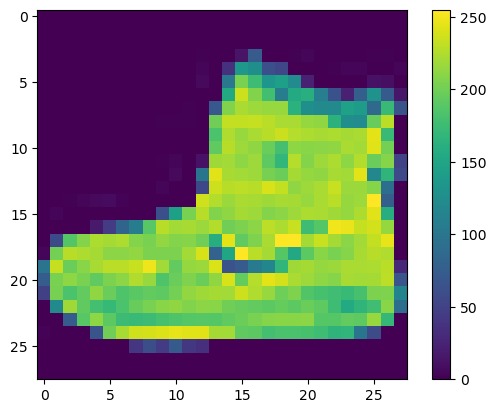

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
#If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255.

#### Normalize pixel values to be between 0 and 1

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Display a sample of images from the training set

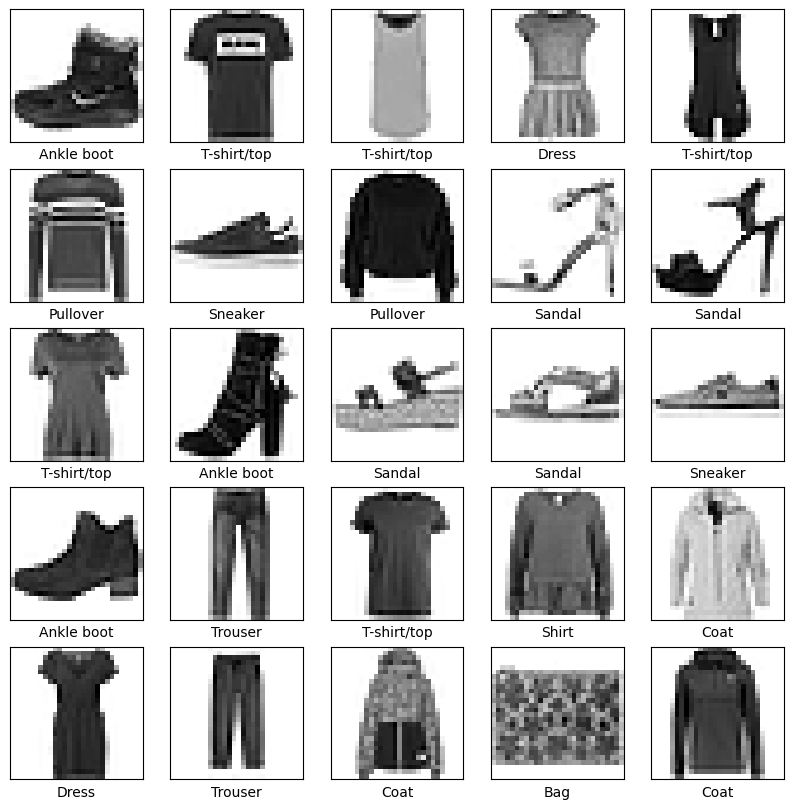

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Define the neural network model

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

### Compile the model

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [10]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


1875/1875 [==============================] - 7s 3ms/step - loss: 0.4975 - accuracy: 0.8260
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3800 - accuracy: 0.8634
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3390 - accuracy: 0.8749
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3136 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2964 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2799 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2703 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2588 - accuracy: 0.9029
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2468 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2

### Evaluate the model on the test dataset

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3413 - accuracy: 0.8792
Test accuracy: 0.8791999816894531


### Make predictions on the test dataset

In [12]:
predictions = model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([1.0859195e-06, 4.3628350e-09, 1.5328064e-08, 5.0284960e-08,
       1.2673112e-08, 2.9639769e-04, 7.1929250e-08, 1.6259123e-02,
       3.4083050e-07, 9.8344296e-01], dtype=float32)

In [13]:
np.argmax(predictions[0])
#Model is most confident that it's an ankle boot. Let's see if it's correct

9

In [14]:
test_labels[0]

9

#### Visualize prediction results for a single image

In [15]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
        plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

#### Visualize prediction results for the probabilities of each class

In [16]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

### Display prediction results for a specific image

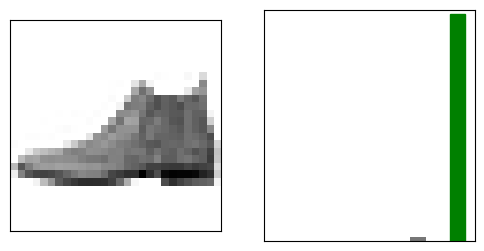

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

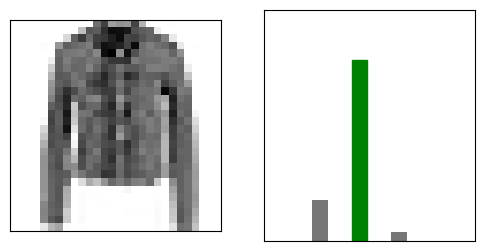

In [18]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

### Display prediction results for multiple images

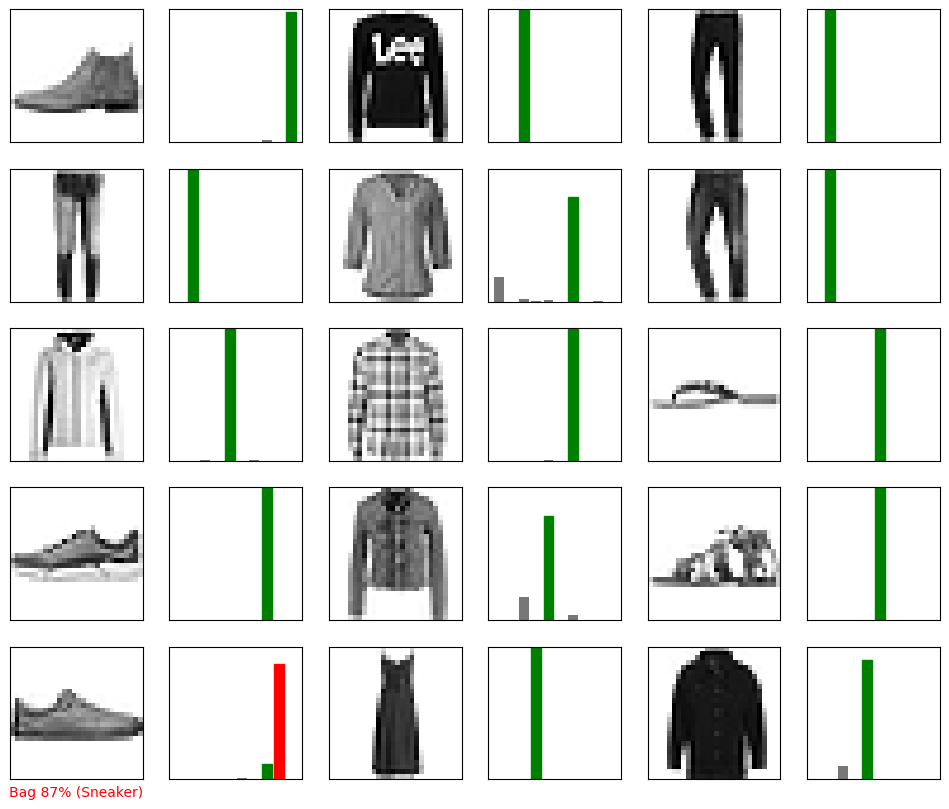

In [19]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

### Make prediction for a single image from the test dataset

In [20]:
# Grab an image from the test dataset
img = test_images[0]
print(img.shape)

(28, 28)


In [21]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [22]:
# Pediction
predictions_single = model.predict(img) 
print(predictions_single)

1/1 [==============================] - 0s 31ms/step
[[1.0859185e-06 4.3628434e-09 1.5328093e-08 5.0284960e-08 1.2673160e-08
  2.9639795e-04 7.1929250e-08 1.6259160e-02 3.4083115e-07 9.8344296e-01]]


### Visualize the prediction results for the single image

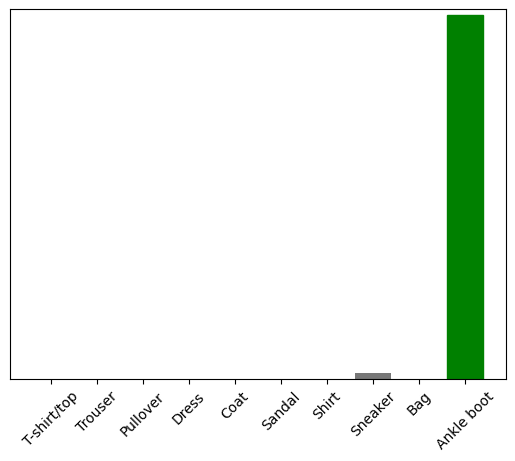

In [23]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

## Get the final prediction result for the single image

In [24]:
prediction_result = np.argmax(predictions_single[0])
print("Final prediction result:", prediction_result)

Final prediction result: 9
